In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [30]:
# get user basic features
users_basic = pd.read_pickle('data/users_features.pickle')
users_basic.head(2)

,user_id,user_age_days_on_platform,user_mean_days_order_interval,user_std_days_order_interval,user_total_orders,user_mean_order_dow,user_std_order_dow,user_mean_order_hour,user_std_order_hour,user_product_total,user_product_unique,user_aisle_unique,user_department_unique,user_reorder_prod_total,user_days_not_purchase,uo_basket_size_mean,uo_basket_size_std,uo_unique_aisle_mean,uo_unique_aisle_std,uo_unique_department_mean,uo_unique_department_std,uo_reorered_products_mean,uo_reordered_products_std,uo_reorder_ratio_mean,uo_reorder_ratio_std,user_reorder_rate,user_reordered_products_per_order,user_next_order_readiness,user_order_freq_days_mean
0,1,176.0,19.555555,9.395625,10,2.500000,1.269296,10.300000,3.591657,59,18,12,7,41.0,14.0,5.900000,1.523884,5.100000,1.100505,3.700000,0.483046,4.100000,1.791957,0.705833,0.317544,0.694915,4.100000,-5.555555,17.600000
1,2,198.0,15.230769,9.867065,14,2.142857,1.231456,10.571429,1.554858,195,102,33,13,93.0,30.0,13.928571,5.717238,8.071429,2.017778,5.642857,1.150728,6.642857,5.300321,0.447961,0.315789,0.476923,6.642857,14.769231,14.142858


In [31]:
# get order details
prior_order_details = pd.read_pickle('data/prior_order_details.pickle')[['order_id', 'user_id', 'product_id']]
products = pd.read_pickle('data/products.pickle')[['product_id', 'aisle']]
prior_order_details = prior_order_details.merge(products, how='left')

prior_order_details.head()

,order_id,user_id,product_id,aisle
0,2539329,1,196,soft drinks
1,2539329,1,14084,soy lactosefree
2,2539329,1,12427,popcorn jerky
3,2539329,1,26088,popcorn jerky
4,2539329,1,26405,paper goods


In [33]:
# count num purchases on each aisle for every user
users_aisles_cnts = pd.crosstab(index=prior_order_details['user_id'], 
                                columns=prior_order_details['aisle']).reset_index()
users_aisles_cnts.head()

aisle,user_id,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,body lotions soap,bread,breakfast bakery,breakfast bars pastries,bulk dried fruits vegetables,bulk grains rice dried goods,buns rolls,butter,candy chocolate,canned fruit applesauce,canned jarred vegetables,canned meals beans,canned meat seafood,cat food care,cereal,chips pretzels,cleaning products,cocoa drink mixes,coffee,cold flu allergy,condiments,cookies cakes,crackers,cream,deodorants,diapers wipes,digestion,dish detergents,dog food care,doughs gelatins bake mixes,dry pasta,eggs,energy granola bars,energy sports drinks,eye ear care,facial care,feminine care,first aid,food storage,fresh dips tapenades,fresh fruits,fresh herbs,fresh pasta,fresh vegetables,frozen appetizers sides,frozen breads doughs,frozen breakfast,frozen dessert,frozen juice,frozen meals,frozen meat seafood,frozen pizza,frozen produce,frozen vegan vegetarian,fruit vegetable snacks,grains rice dried goods,granola,hair care,honeys syrups nectars,hot cereal pancake mixes,hot dogs bacon sausage,ice cream ice,ice cream toppings,indian foods,instant foods,juice nectars,kitchen supplies,kosher foods,latino foods,laundry,lunch meat,marinades meat preparation,meat counter,milk,mint gum,missing,more household,muscles joints pain relief,nuts seeds dried fruit,oils vinegars,oral hygiene,other,other creams cheeses,packaged cheese,packaged meat,packaged poultry,packaged produce,packaged seafood,packaged vegetables fruits,paper goods,pasta sauce,pickled goods olives,plates bowls cups flatware,popcorn jerky,poultry counter,prepared meals,prepared soups salads,preserved dips spreads,protein meal replacements,red wines,refrigerated,refrigerated pudding desserts,salad dressing toppings,seafood counter,shave needs,skin care,soap,soft drinks,soup broth bouillon,soy lactosefree,specialty cheeses,specialty wines champagnes,spices seasonings,spirits,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,8,0,0,0,0,0,2,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2,0,3,0,0,0,0,2,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,1,0,0,12,0,0,0,0,5,0,11,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,9,33,0,0,0,0,1,0,0,0,12,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,10,0,0,0,0,0,0,0,3,0,1,0,0,5,0,1,0,0,3,0,0,1,0,10,0,0,1,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,3,1,1,0,0,0,0,2,0,42
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,5,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,5,0,0,0,0,14,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,4,1,0,0,0,0,0,2,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4,5,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,1,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [34]:
# merge features
users = users_basic.merge(users_aisles_cnts, on='user_id', how='inner')
print('user feature shape:')
print(users.shape)

user feature shape:
(206209, 163)


In [35]:
# scaling
train = users.drop('user_id', axis=1)
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train.values)

Let's decide the number of clusters by plotting loss against it

Text(0.5, 0, 'Number of Components')

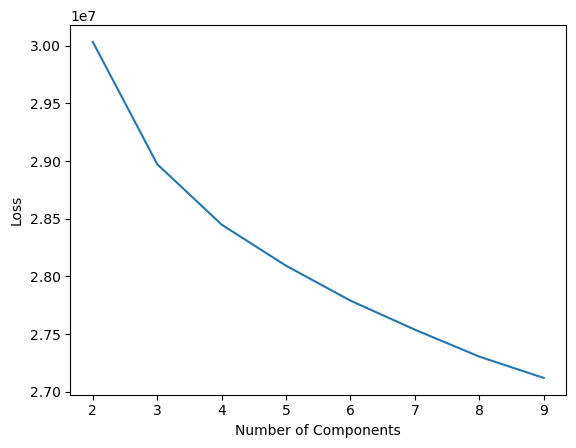

In [38]:
inertia = []
for n in range(2, 10):
    kmeans = KMeans(n_clusters=n, random_state=n).fit(train_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(2, 10), inertia)
plt.ylabel('Loss')
plt.xlabel('Number of Components')

The elbow point is not so clear, 3, 4, 5 all seem promosing. Try to use 4 components frist

In [39]:
kmeans = KMeans(n_clusters=4, random_state=4).fit(train_scaled)

In [40]:
# get cluster center on each feature dimension
cluster_res = kmeans.predict(train_scaled)
users['user_cluster'] = cluster_res

In [41]:
# get the cluster center on each dimmension/feature
cluster_centers = pd.DataFrame(kmeans.cluster_centers_.transpose(), index=train.columns)
cluster_centers.head()

,0,1,2,3
user_age_days_on_platform,-0.427051,1.194765,-0.119290,1.651237
user_mean_days_order_interval,0.276398,-0.781362,0.095793,-1.225029
user_std_days_order_interval,0.055087,-0.318473,0.148064,-0.876302
user_total_orders,-0.397337,1.196030,-0.254597,2.650966
user_mean_order_dow,0.040920,0.002956,-0.054376,0.018392


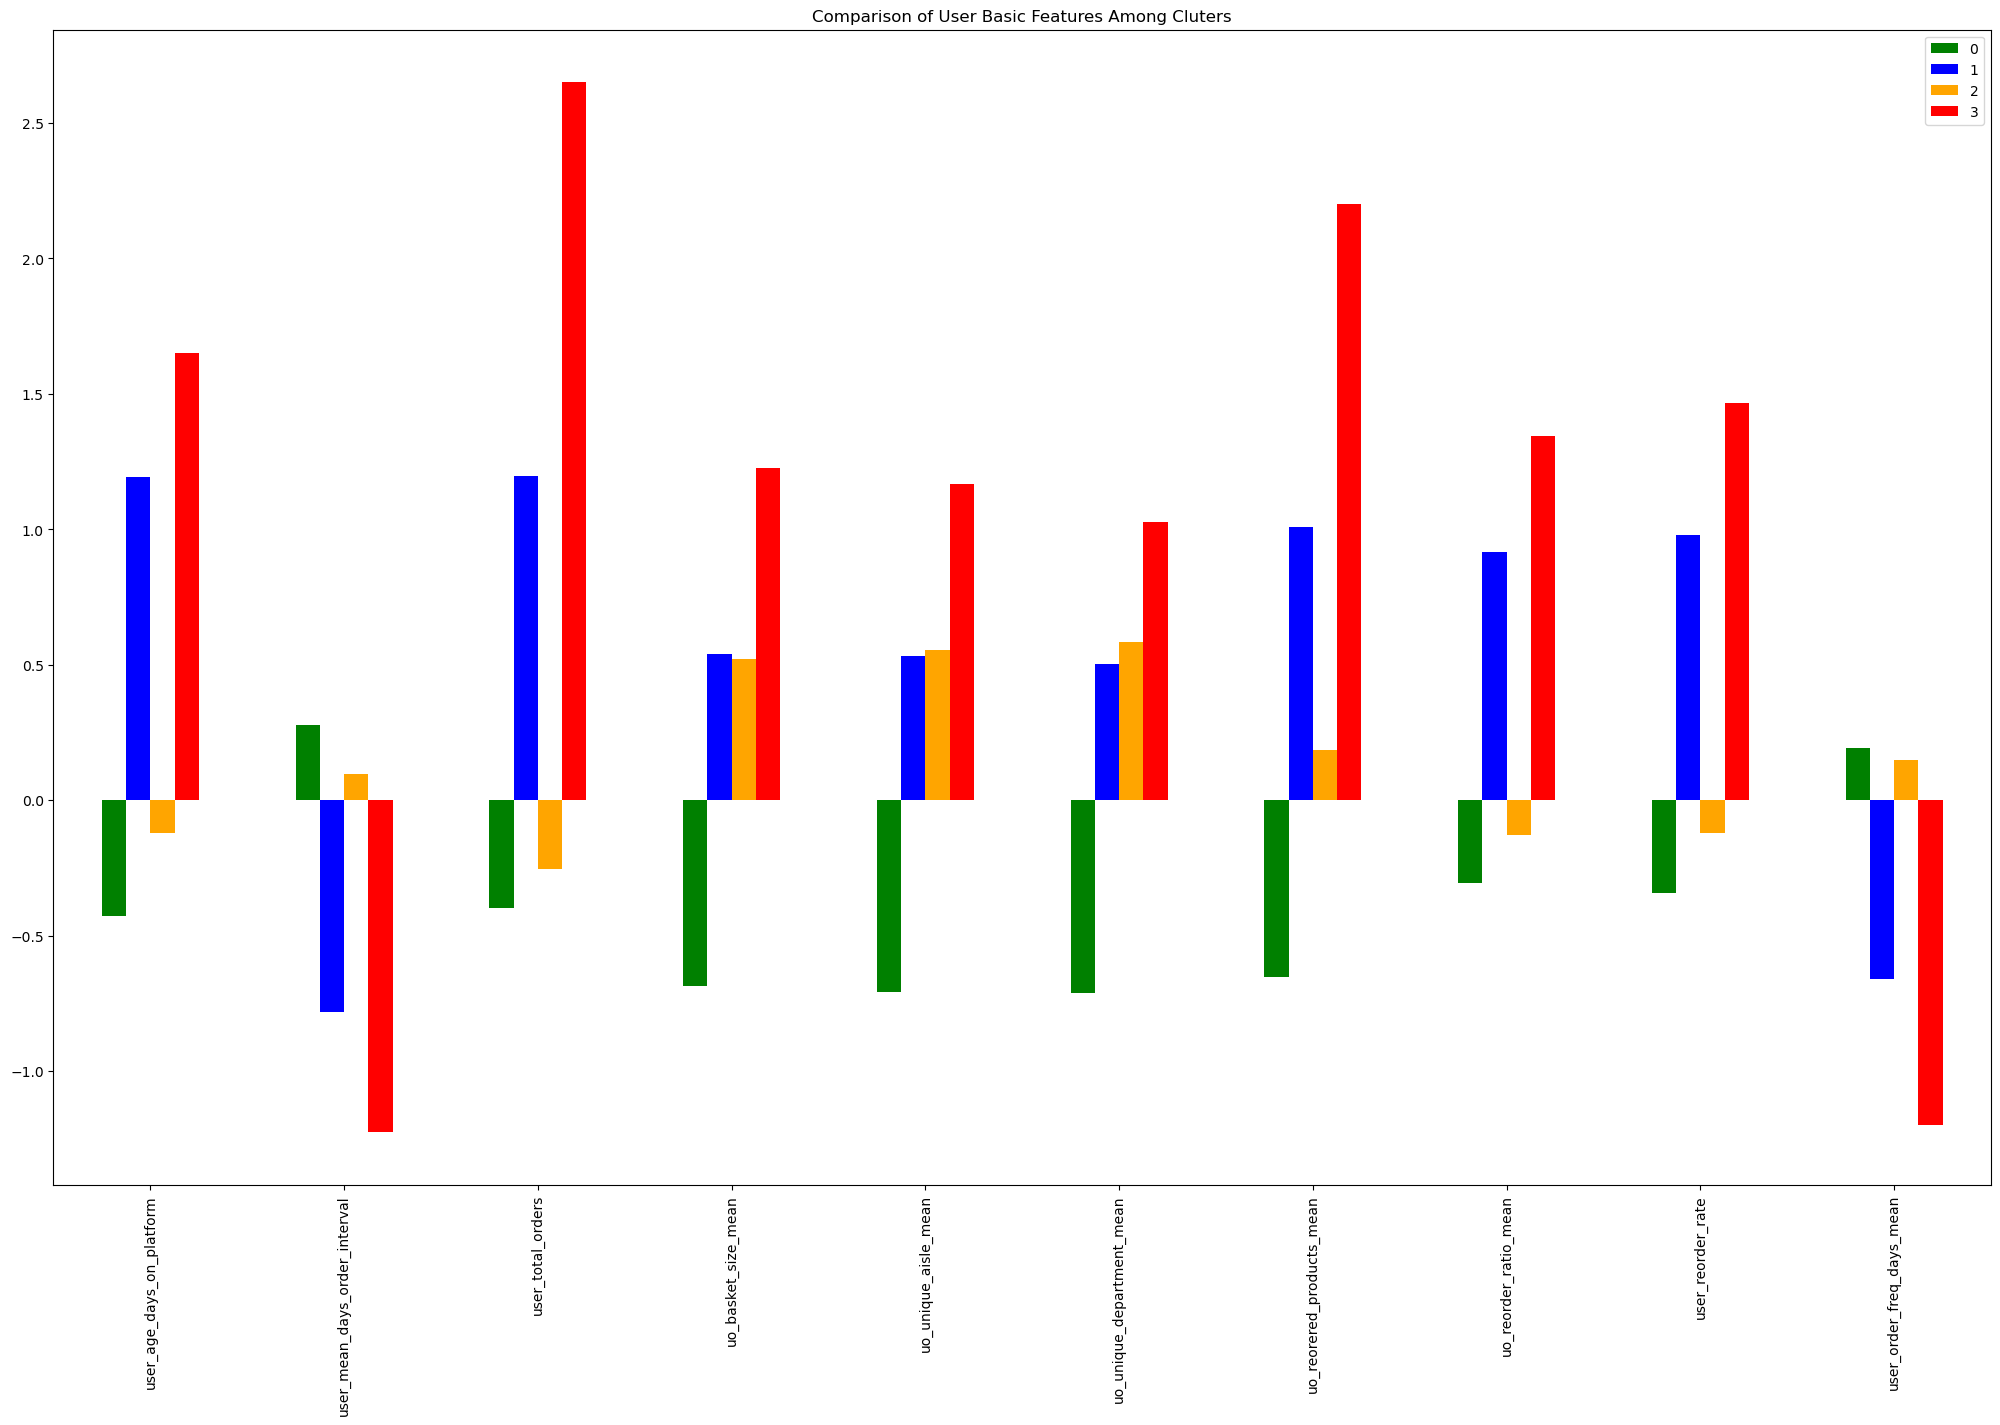

In [42]:
cols = ['user_age_days_on_platform', 'user_mean_days_order_interval', 'user_total_orders',
       'uo_basket_size_mean', 'uo_unique_aisle_mean', 'uo_unique_department_mean', 'uo_reorered_products_mean',
       'uo_reorder_ratio_mean', 'user_reorder_rate', 'user_order_freq_days_mean']
color_list = ['g', 'b', 'orange', 'r']
cluster_centers.loc[cols, :].plot(kind='bar', color=color_list, figsize=(25, 15))
plt.title('Comparison of User Basic Features Among Cluters')
plt.savefig('data/Comparison of User Basic Features Among Cluters')
plt.show()

- cluster 0 (green bars): Old customers, order frequently. They usually have moderate basket size. They order from a fair amount of aisles and departments and they reorder a lot
- cluster 1 (blue bars): Newest group of customers on Instacart. They make orders infrequently and order size are usually small. So far, they only order from a few aisles and products. Overally Instacart is still very new to them .
- cluster 2 (orange bars): have been with Instacart for some time. They usually have moderate basket size and order frequently. They order from a fair amount of aisles and departments and they love try different products. 
- cluster 3 (red bars): Royal customers. They make orders frequently and their basket is pretty diverse and they have the highest reorder rate.

We want to analyze if there are any difference between the types of products customers in different clusters purchase

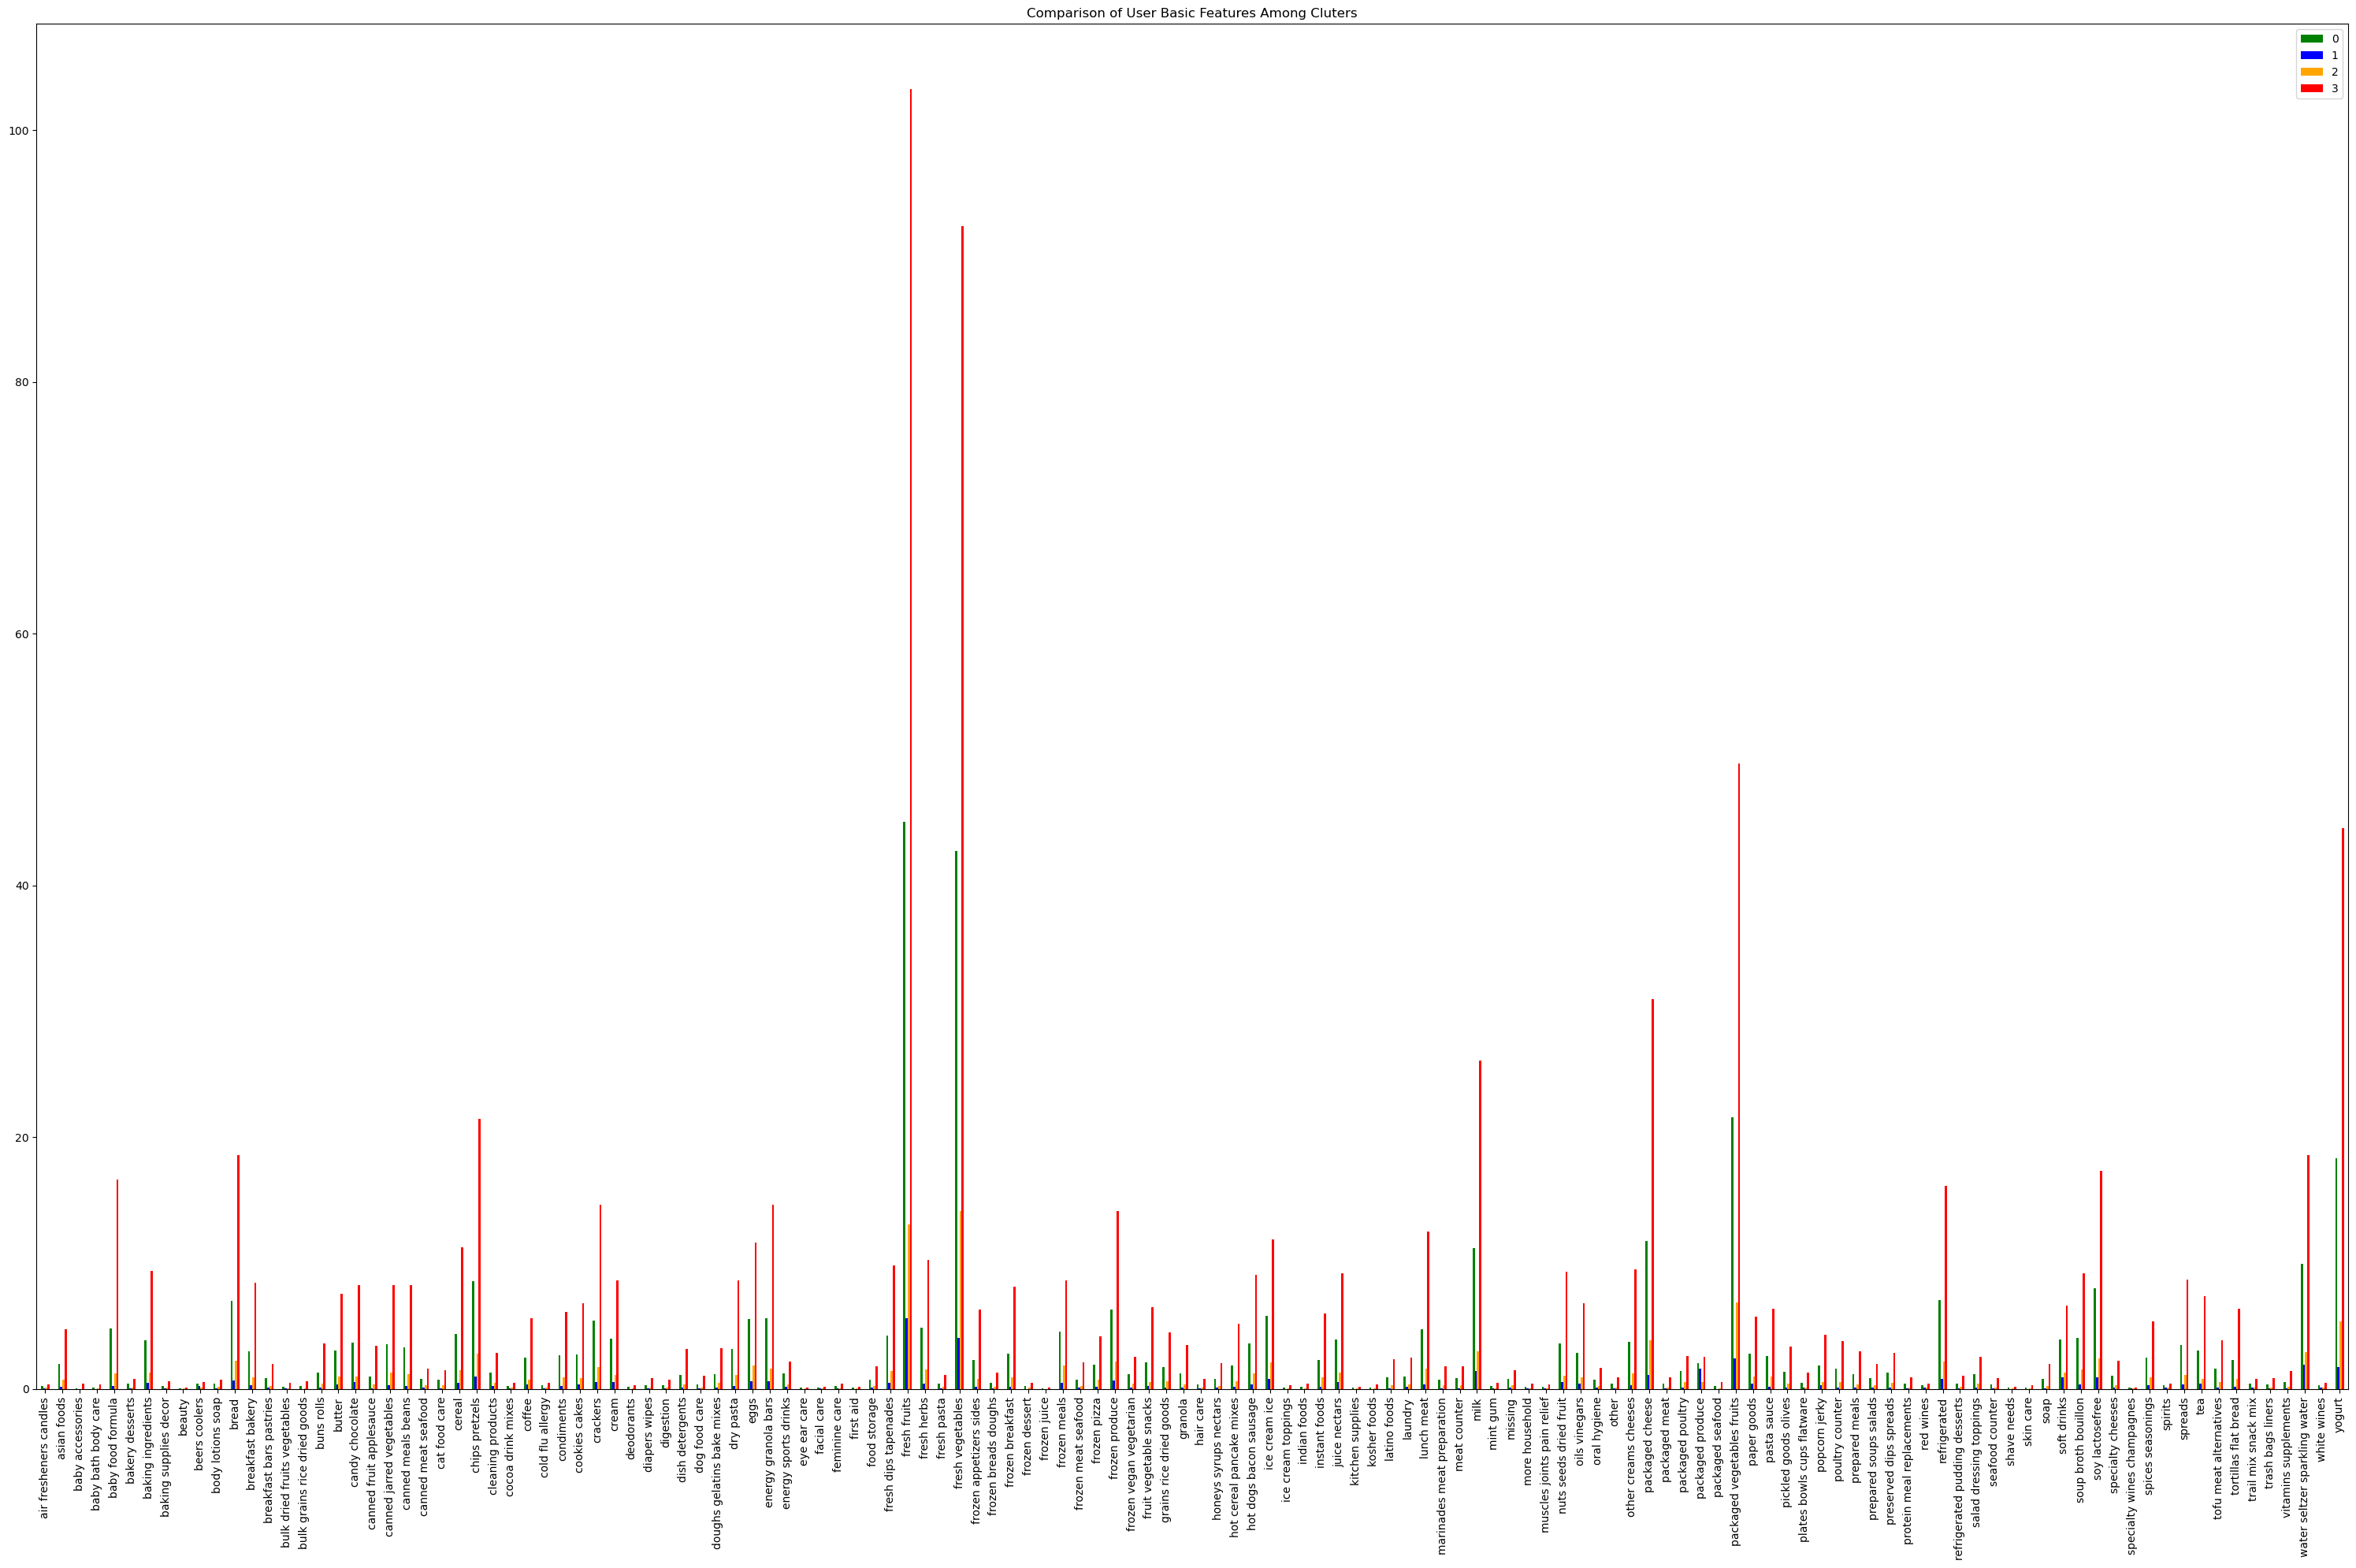

In [43]:
color_list = ['g', 'b', 'orange', 'r']
cluster_centers_unscaled.loc[users_aisles_cnts.drop('user_id', axis=1).columns.to_list(), :].plot(kind='bar', color=color_list, figsize=(30, 20))
plt.title('Comparison of User Basic Features Among Cluters')
plt.savefig('data/Comparison of Products Purchased Among Cluters')
plt.tight_layout()
plt.show()

Difficult to tell much about users' about products on this visualization. A few we can say are: 
- cluster 1 (blue bars): The only product that they purchase more than average is *packaged produce*
- cluster 3 (red bars): They order most on each aisle, compared with users in other clusters

Let's check if there are any pattern in the top 5 products bought by people in each cluster. 

In [44]:
prods_sales = cluster_centers.loc[users_aisles_cnts.drop('user_id', axis=1).columns.to_list(), :].add_prefix('user_cluster_')
clusters = ['user_cluster_0', 'user_cluster_1', 'user_cluster_2', 'user_cluster_3']
for cluster in clusters:
    print(prods_sales[[cluster]].sort_values(by = cluster, ascending=False).head(5))
    print('\n')

                            user_cluster_0
packaged produce                  0.045012
beers coolers                    -0.004915
specialty wines champagnes       -0.016518
red wines                        -0.024366
spirits                          -0.025702


                            user_cluster_1
fresh fruits                      0.912148
packaged vegetables fruits        0.880150
fresh vegetables                  0.868573
packaged cheese                   0.758229
milk                              0.705066


                  user_cluster_2
frozen dessert         -0.001417
deodorants             -0.002015
frozen meals           -0.002431
packaged poultry       -0.002586
indian foods           -0.004455


                            user_cluster_3
packaged cheese                   2.849265
fresh fruits                      2.849060
packaged vegetables fruits        2.780047
fresh vegetables                  2.521472
bread                             2.430557




- The top 5 most purchased products are similar for cluster 0 and cluster 1 is similar, though the order size is pretty different. 
- what differentiate cluster 1 is that they buy some drinks and wines
- what seperate cluster 2 is that they buy some frozen food, and they even buy from deodorants, more of an unpopular aisle on Instacart. 